In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
url = "pak_wheels.csv"
df = pd.read_csv(url)

In [13]:
df.head()

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,mileage_category,post_day_of_week,vehicle_age
0,Honda N One Premium 2014,2650000,Lahore,2014,82000,Petrol,Automatic,Lahore,Blue,Imported,660,2024-05-04,Medium,Medium,Saturday,10
1,Nissan Note 2020,5400000,Lahore,2020,59000,Hybrid,Automatic,Un-Registered,Silver,Imported,1200,2024-05-04,High,Medium,Saturday,4
2,Suzuki Vitara GLX 1.6 2017,0,Karachi,2017,67000,Petrol,Automatic,Karachi,Grey,Imported,1600,2024-05-04,Low,Medium,Saturday,7
3,Toyota Yaris Cross 2021,7850000,Lahore,2021,41000,Hybrid,Automatic,Un-Registered,Beige,Imported,1500,2024-05-04,High,Low,Saturday,3
4,BMW X1 sDrive18i 2017,10700000,Islamabad,2017,37000,Petrol,Automatic,Islamabad,White,Imported,1500,2024-05-04,High,Low,Saturday,7


In [14]:
df.describe()


,price,model,mileage,engine_capacity,vehicle_age
count,4.818900e+04,48189.000000,48189.000000,48189.000000,48189.000000
mean,4.300611e+06,2013.690074,90444.885327,1417.805038,10.309926
std,6.285592e+06,7.511492,85300.588856,715.792743,7.511492
min,0.000000e+00,1990.000000,1.000000,100.000000,0.000000
25%,1.689999e+06,2008.000000,36000.000000,1000.000000,4.000000
50%,3.000000e+06,2016.000000,79192.000000,1300.000000,8.000000
75%,4.750000e+06,2020.000000,122456.000000,1600.000000,16.000000
max,1.750000e+08,2024.000000,1000000.000000,15000.000000,34.000000


In [15]:
df.tail(10)

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,mileage_category,post_day_of_week,vehicle_age
48179,Nissan Patrol 2012,25000000,Karachi,2012,49000,Petrol,Automatic,Karachi,Grey,Imported,5700,2024-05-09,High,Low,Thursday,12
48180,Suzuki Mehran VXR Euro II 2013,1250000,Lahore,2013,30000,Petrol,Not Available,Lahore,Maroon,Local,796,2024-05-09,Low,Low,Thursday,11
48181,Toyota Vitz F 1.0 2012,2050000,Rawalpindi,2012,98000,Petrol,Automatic,Punjab,Silver,Imported,1000,2024-05-09,Low,Medium,Thursday,12
48182,Suzuki Mehran VX 2007,675000,Islamabad,2007,100000,Petrol,Not Available,Rawalpindi,Blue,Local,800,2024-05-09,Low,Medium,Thursday,17
48183,Suzuki Bolan 2020,155000,Depal pur,2020,80000,Petrol,Not Available,Lahore,White,Local,660,2024-05-09,Low,Medium,Thursday,4
48184,Toyota Prius S 2020,8500000,Peshawar,2020,95000,Hybrid,Automatic,Un-Registered,Super White,Imported,1800,2024-05-09,High,Medium,Thursday,4
48185,Toyota Corolla GLi Automatic 1.3 VVTi 2019,4211000,Karachi,2019,80793,Petrol,Automatic,Karachi,White,Local,1300,2024-05-09,High,Medium,Thursday,5
48186,Suzuki Mehran VX Euro II 2017,1130000,Sangla hills,2017,72862,Petrol,Not Available,Lahore,Graphite Grey,Local,796,2024-05-09,Low,Medium,Thursday,7
48187,Suzuki Baleno Sport 2004,1070000,Lahore,2004,1000,Petrol,Not Available,Lahore,Black,Local,1300,2024-05-09,Low,Low,Thursday,20
48188,Suzuki Sx4 1.5 G 2007,1950000,Abbottabad,2007,153000,Petrol,Automatic,Islamabad,white,Imported,1500,2024-05-09,Low,High,Thursday,17


In [16]:
print(f"rows and columns:{df.shape}")
df.info()

rows and columns:(48189, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48189 entries, 0 to 48188
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             48189 non-null  object
 1   price             48189 non-null  int64 
 2   city              48189 non-null  object
 3   model             48189 non-null  int64 
 4   mileage           48189 non-null  int64 
 5   fuel_type         48189 non-null  object
 6   transmission      48189 non-null  object
 7   registered        48189 non-null  object
 8   color             48189 non-null  object
 9   assembly          48189 non-null  object
 10  engine_capacity   48189 non-null  int64 
 11  post_date         48189 non-null  object
 12  price_category    48189 non-null  object
 13  mileage_category  48189 non-null  object
 14  post_day_of_week  48189 non-null  object
 15  vehicle_age       48189 non-null  int64 
dtypes: int64(5), object(11)
memor

In [17]:
df.isnull().sum()


title               0
price               0
city                0
model               0
mileage             0
fuel_type           0
transmission        0
registered          0
color               0
assembly            0
engine_capacity     0
post_date           0
price_category      0
mileage_category    0
post_day_of_week    0
vehicle_age         0
dtype: int64

In [21]:
print(df.columns)


Index(['title', 'price', 'city', 'model', 'mileage', 'fuel_type',
       'transmission', 'registered', 'color', 'assembly', 'engine_capacity',
       'post_date', 'price_category', 'mileage_category', 'post_day_of_week',
       'vehicle_age'],
      dtype='object')


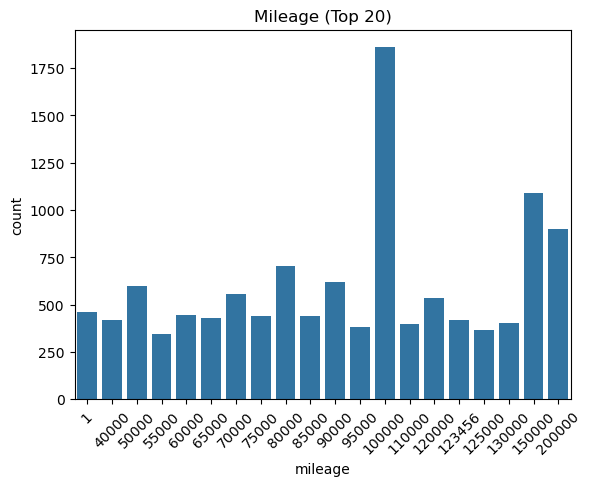

In [22]:
top_mileage = df['mileage'].value_counts().nlargest(20).index
sns.countplot(x='mileage', data=df[df['mileage'].isin(top_mileage)])
plt.title('Mileage (Top 20)')
plt.xticks(rotation=45)  # Rotate labels for visibility
plt.show()

In [24]:
df = df.dropna(subset=['price'])

# Example: Fill missing engine_capacity instead of engine
df['engine_capacity'] = df['engine_capacity'].fillna(df['engine_capacity'].median())

# Keep only available columns
df = df[['vehicle_age', 'engine_capacity', 'mileage', 'price']].dropna()


In [25]:
df.head()


,vehicle_age,engine_capacity,mileage,price
0,10,660,82000,2650000
1,4,1200,59000,5400000
2,7,1600,67000,0
3,3,1500,41000,7850000
4,7,1500,37000,10700000


In [26]:
df = df.dropna(subset=['price'])

df['engine_capacity'] = df['engine_capacity'].fillna(df['engine_capacity'].median())

df = df[['vehicle_age', 'engine_capacity', 'mileage', 'price']].dropna()

df.head()


,vehicle_age,engine_capacity,mileage,price
0,10,660,82000,2650000
1,4,1200,59000,5400000
2,7,1600,67000,0
3,3,1500,41000,7850000
4,7,1500,37000,10700000


In [30]:
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.columns)


Index(['vehicle_age', 'engine_capacity', 'mileage', 'price'], dtype='object')


In [31]:
X = df[['vehicle_age', 'engine_capacity', 'mileage']]
y = df['price']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
from sklearn.metrics import r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² Score
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.35889364109938804
